In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from wavelets import *
from draws import *
from chaos_searh import *
from BP_dynamics import *
import pywt
import scipy as sp
import scipy.ndimage
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

In [4]:
plt.rcParams.update({'font.size': 25})

In [5]:
Iext = 0.5 # возбуждающий импульс на пирамидальную клетку (P)
G = 0.5 # проводимость мембран -- определяют относительный вклад клетки в динамику ансамбля
Eex = 0 # напряжение на выходной клетке (P) -- для активаторной, возбуждающей клетки
Ein = -5 # напряжение на входной клетке (B) -- для ингибиторной, тормозящей клетки
eps = 0.3 # временной масштаб осцилляций (отношение быстрой переменной к медленной)
a = 0.5 # параметры кинетики суммарного ионного тока u
b = 0.8 # параметры кинетики суммарного ионного тока u
A = 1 # синаптический параметрб ответственный за приток (B -- за отток)
vsl = 0.1 # синаптический параметр (открытие синапсов быстрее чем закрытие)

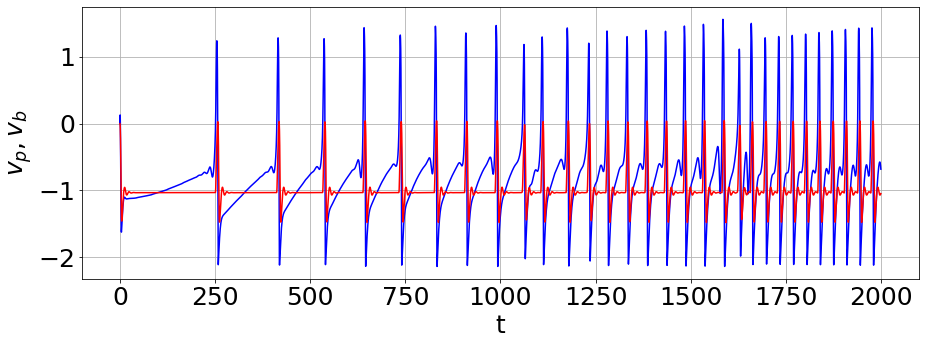

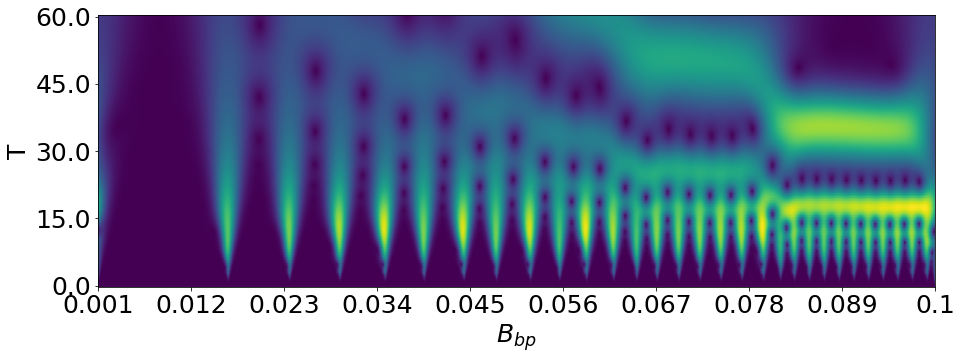

In [30]:
Bpb = 0.3
Bbpmin = 0.001
Bbpmax = 0.1

scale = np.linspace(0, 60, 101)
args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, Bbpmax, vsl)

signal_draw1(args1, vp0=0, vb0=0, up0=0, ub0=0, sbp0=0, spb0=0, ts=2000, nt=2**20)
wavelet_draw(args1, scale, ts=2000, nt=2**15, Bmin=Bbpmin, Bmax=Bbpmax)

[  101 32768]


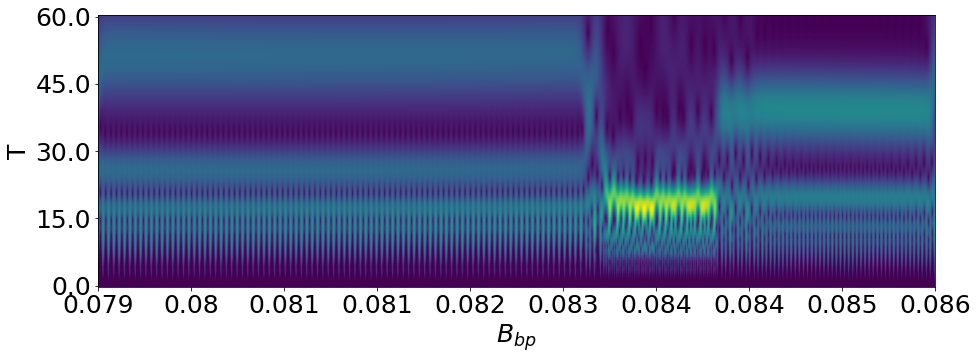

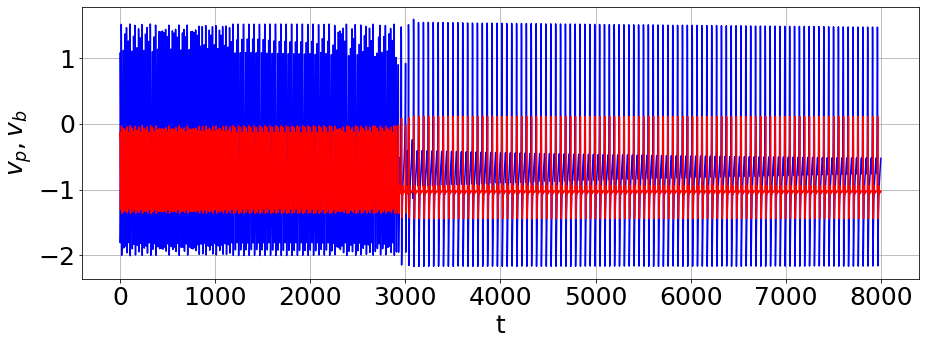

In [7]:
Bpb = 0.19 # синаптический параметр
Bbpmin = 0.079 # синаптический параметр
Bbpmax = 0.086 # синаптический параметр

args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmin, Bbpmax, vsl)

# wavelet_draw(args1, scale, vp0=-1.5, vb0=-1.5, up0=0.5, ub0=0.5, sbp0=0.5, spb0=0.5, ts=8000, nt=2**15, Bmin=Bbpmin, Bmax=Bbpmax)
sol, t = calcODE1(args1, -1.5, -1.5, 0.5, 0.5, 0.5, 0.5, 8000, 2 ** 18)

args1 = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbpmax,  Bbpmin, vsl)
wavelet_draw_inv(args1, scale, *sol[-1], ts=8000, nt=2**15, Bmin=Bbpmin, Bmax=Bbpmax)
signal_draw1(args1, *sol[-1], ts=8000, nt=2**15)

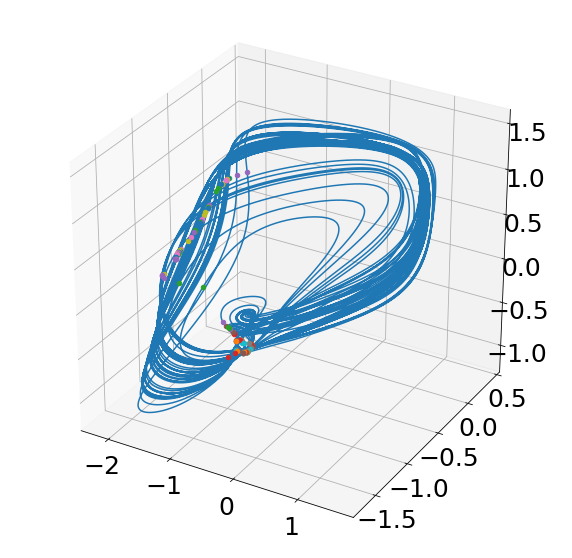

In [81]:
Bbp = 0.08
Bpb = 0.4655
args = (Iext, G, Ein, Eex, eps, a, b, A, Bpb, Bbp, vsl)

ts = 4000
nt = 2 ** 20


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sol, t = calcODE(args, -1.5, -1.5, 0.5, 0.5, 0.5, 0.5, ts=ts, nt=nt)
sol = sol[-len(sol) // 2:, :]
ax.plot(xs = sol[:, 0], ys = sol[:, 1], zs = sol[:, 2])

x0 = sol[0, :]
t = t[-len(sol)//2:]
n = ode(x0, t, *args)

for i in range(len(sol) - 1):
    x1 = sol[i]
    x2 = sol[i + 1]
    if np.copysign((n @ (x1 - x0)), (n @ (x2 - x0))) != (n @ (x1 - x0)):
        c1 = dist(x1, x0, n)
        c2 = dist(x2, x0, n)
        alpha = c2 / (c1 + c2)
        x = x1 + alpha * (x2 - x1)
        ax.scatter(x[0], x[1], x[2])
        
plt.show()